# Top 10k pages data

We're running the top 10k pages from analytics.usa.gov for the last 30 days through the CrUX API to get page-level information.

In [21]:
import os
import pandas as pd

pd.set_option('display.max_rows', 500)

def load_results_to_dataframe(**kwargs):
    file_path = os.path.join(kwargs["notebook_dir"], kwargs["file_name"])
    return pd.read_csv(file_path)

In [22]:
sitescanning = load_results_to_dataframe(
    file_name="data/site-scanning-weekly-snapshot-20240722.csv",
    notebook_dir=os.getcwd()
)

top10k = load_results_to_dataframe(
    file_name="data/top-10000-pages-and-screens-30-days-20240812.csv",
    notebook_dir=os.getcwd()
)

top10k['url'] = top10k.apply(lambda row: 'https://' + str(row['domain']) + str(row['pagePath']), axis=1)


In [23]:
common_urls = pd.merge(sitescanning, top10k, left_on='final_url', right_on='url')
common_urls.drop_duplicates(subset='url', keep='first', inplace=True)
common_urls.head()

,target_url,target_url_domain,target_url_top_level_domain,target_url_redirects,final_url,final_url_domain,final_url_top_level_domain,final_url_website,final_url_live,final_url_status_code,...,uswds_string,uswds_string_in_css,uswds_semantic_version,uswds_version,uswds_count,page_title,domain,pagePath,pageviews,url
0,www.lcacommons.gov,lcacommons.gov,.gov,False,https://www.lcacommons.gov/,lcacommons.gov,gov,www.lcacommons.gov,True,200,...,0,0,NaN,0,26,Welcome to the Federal LCA Commons | Life Cycl...,www.lcacommons.gov,/,1314,https://www.lcacommons.gov/
1,www.rurdev.usda.gov,usda.gov,.gov,True,https://www.rd.usda.gov/,usda.gov,gov,www.rd.usda.gov,True,200,...,61,20,NaN,0,172,Rural Development,www.rd.usda.gov,/,20006,https://www.rd.usda.gov/
2,www.studentaid.gov,studentaid.gov,.gov,True,https://studentaid.gov/,studentaid.gov,gov,studentaid.gov,True,200,...,0,0,NaN,0,40,Federal Student Aid,studentaid.gov,/,198948,https://studentaid.gov/
4,fossil.energy.gov,energy.gov,.gov,True,https://www.energy.gov/fecm/office-fossil-ener...,energy.gov,gov,www.energy.gov,True,200,...,0,0,NaN,0,0,Office of Fossil Energy and Carbon Management ...,www.energy.gov,/fecm/office-fossil-energy-and-carbon-management,33981,https://www.energy.gov/fecm/office-fossil-ener...
5,www.therealcost.gov,therealcost.gov,.gov,True,https://therealcost.betobaccofree.hhs.gov/,hhs.gov,gov,therealcost.betobaccofree.hhs.gov,True,200,...,0,0,NaN,0,0,What Is The Real Cost? - Smoking and Tobacco F...,therealcost.betobaccofree.hhs.gov,/,1950,https://therealcost.betobaccofree.hhs.gov/


In [24]:
print(f"There are {len(common_urls)} urls from the site scanning report that also appear in the top-10000 pages and screens report from analytics.usa.gov.")

There are 697 urls from the site scanning report that also appear in the top-10000 pages and screens report from analytics.usa.gov.


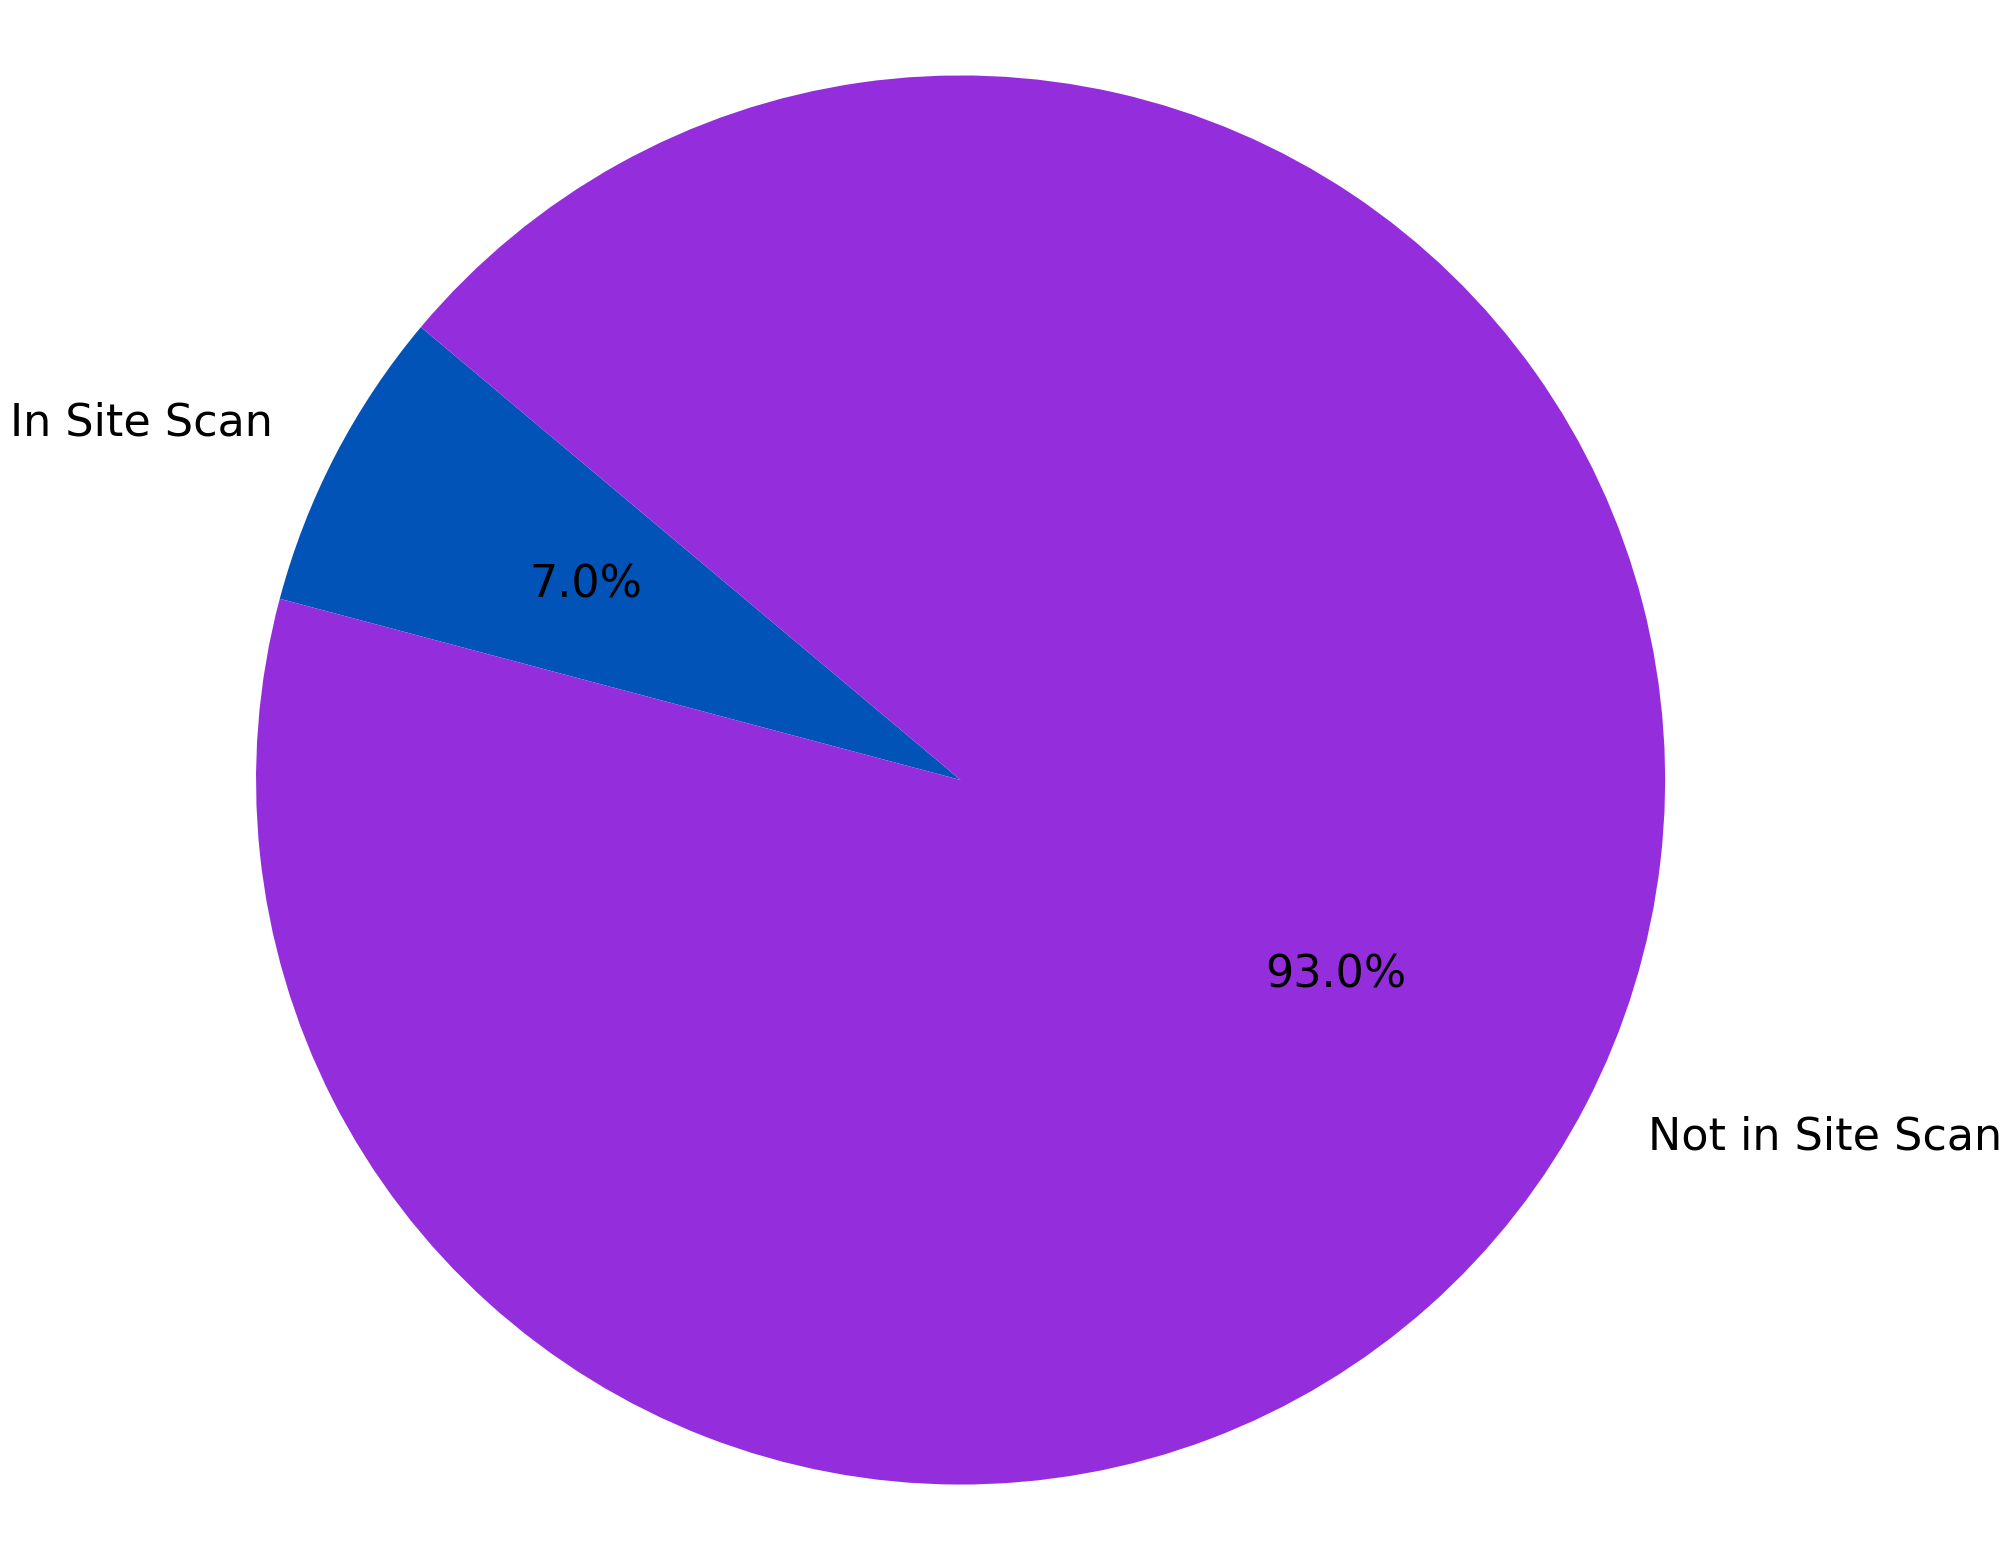

In [43]:
import matplotlib.pyplot as plt

common_urls_count = len(common_urls)
other_urls_count = len(top10k) - common_urls_count

# Data to plot
labels = 'In Site Scan', 'Not in Site Scan'
sizes = [common_urls_count, other_urls_count]

plt.figure(figsize=(20, 20))

# Create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, colors=['#0153b7', '#942ddb'], startangle=140, textprops={'fontsize': 32})

plt.axis('equal')
plt.show()